> # Homework #1
This assignment deals with decision trees and their basic use using simple Python code.

In [1]:
# Various libraries used in this script
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , f1_score

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
from matplotlib import pyplot as plt

### Lets define a function that is doing:


1.   Taking a dataset and creating a decision tree
2.   Fitting a model for this tree
3.   Calculating and return accuracy, precision, tree max depth, recall and f1 for a tree.

This function should also be able to get as arguments the cross validation (`cv`) number and the max depth (`md`) of the tree.

(This function answer questions 1 a-c in the homework)



In [8]:

def analyze_ds(dataset , cv=10 , md = 80):

    # creating new tree cls
    cls = DecisionTreeClassifier()
    cls.max_depth = md

    # creating a model
    cls.fit(dataset.data , dataset.target)

    # clac accuracy
    ## seem like when the cross validation split is greater the 
    ## number of members in each class, this claculation is
    ## crushing the program, so if this is the case, the number 
    ## of cv reduced to 2
    try:
        ac =  cross_val_score(
            cls,
            dataset.data,
            dataset.target,
            scoring='accuracy',
            cv=cv
        )
    except:
        ac =  cross_val_score(
            cls,
            dataset.data,
            dataset.target,
            scoring='accuracy',
            cv=2
        )
    # clac precision
    try:
        pre =  cross_val_score(
            cls,
            dataset.data,
            dataset.target,
            scoring='precision_weighted',
            cv=cv
        )
    except:
        pre =  cross_val_score(
        cls,
        dataset.data,
        dataset.target,
        scoring='precision_weighted',
        cv=2
        )

    y_prd = cls.predict(dataset.data)

    rc = recall_score(dataset.target , y_prd ,average = "weighted", zero_division=0)


    return round(ac.mean() , 3) , round(pre.mean() , 3) , cls.tree_.max_depth , rc , f1_score(dataset.target , y_prd , zero_division=0, average = "macro")
   

### The next function we need should be able to do a plot for:

1.   Any of the arguments given from the prev function vs any other argument.
2.   Use the keys for those arguments to mark the title and the axis names.

(This function answer question 3 in the homework)


In [9]:
  
def my_plot(x_label : str , y_label : str , table : dict) -> None:    

    plt.plot(table[x_label] , table[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs {x_label}")
    plt.show()


We want to run this `analyze_ds()` function with a number of possible max depth. The next function:
1.  take a dataset and run the `analyze_ds()` on it with max depth from 1 to 10.
2.  adding the results to a table (python dictionary). 
3.  Printing the table on screen.
4.  ploting 4 diffrent graphs from the columns of the table. 
5.  It also finding the highest accuracy value in the column, and matching the max depth value for it and returns it.

(This function answers questions 1,2,3 using the functions from above)

In [10]:

def main(dataset):

    table = {"Accuracy":[] , "Precision": [], "Max Depth": [], "Recall Score": [] , "F1 score" : [] }

    for i in range(1,11):
        
        v_list = analyze_ds(dataset , md = i)

        table["Accuracy"].append(v_list[0])
        table["Precision"].append(v_list[1])
        table["Max Depth"].append(v_list[2])
        table["Recall Score"].append(v_list[3])
        table["F1 score"].append(v_list[4])

    df = pd.DataFrame(table)

    print(df.to_string(index=False))


    my_plot("Max Depth" , "Accuracy" , table)
    my_plot("Max Depth" , "Precision" , table)
    my_plot("Max Depth" , "Recall Score" , table)
    my_plot("Max Depth" , "F1 score" , table)

    # find the highest accuracy score and match to the best max depth
    best_ac = max(table["Accuracy"])
    best_ac_loc = table["Accuracy"].index(best_ac)
    best_md = table["Max Depth"][best_ac_loc]


    return best_md



Great, now lets apply the `main()` function to a dataset.
We can use any dataset from the `sklearn.datasets` lib and simply sending it to the function. In question 1 we were asked to perform the measurements for the database for diabetes:

 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.016      0.000          1      0.022624  0.000415
    0.011      0.000          2      0.038462  0.001619
    0.009      0.000          3      0.056561  0.008552
    0.007      0.001          4      0.090498  0.026792
    0.007      0.000          5      0.133484  0.060131
    0.002      0.000          6      0.190045  0.118320
    0.007      0.002          7      0.264706  0.194609
    0.007      0.001          8      0.343891  0.273669
    0.007      0.002          9      0.438914  0.387649
    0.011      0.001         10      0.479638  0.415314


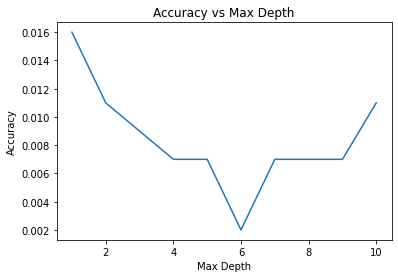

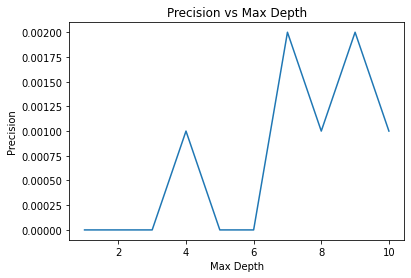

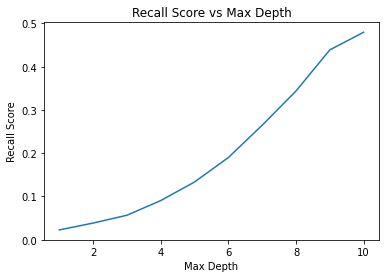

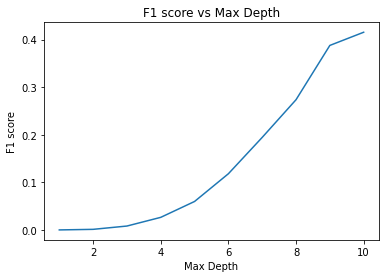

Best Max Depth:  1


In [11]:
# ! To check another option, simply change the load_diabetes() function to any other dataset
# from the sklearn library possible datasets.

best_max_depth = main(datasets.load_diabetes())
print("Best Max Depth: " , best_max_depth)

Now, lets write a basic loop to do the above in one go for the three datasets:

1.  Iris Datasets
2.  Wine Dataset
3.  Digits Dataset

(This part answers questions 4 and 5 in the homework)



 .. _iris_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.667      0.500          1      0.666667  0.555556
    0.947      0.955          2      0.960000  0.959936
    0.960      0.967          3      0.973333  0.973323
    0.960      0.959          4      0.993333  0.993333
    0.953      0.959          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.960      0.964          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.960      0.964          5      1.000000  1.000000
    0.960      0.959          5      1.000000  1.000000


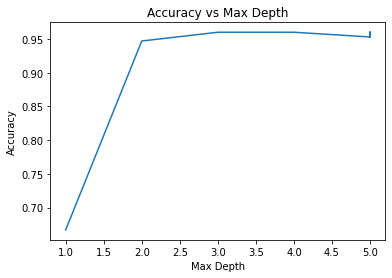

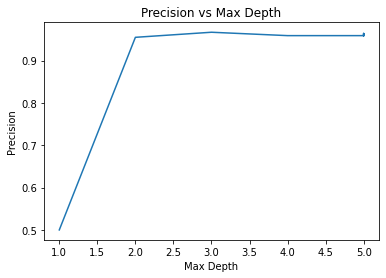

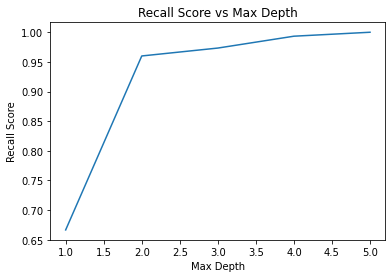

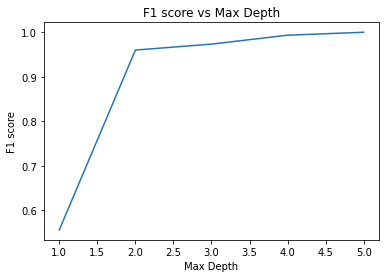

Best Max Depth:  3


 .. _wine_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.620      0.498          1      0.696629  0.547009
    0.844      0.866          2      0.921348  0.921707
    0.872      0.902          3      0.977528  0.978049
    0.865      0.892          4      0.988764  0.989623
    0.865      0.893          5      1.000000  1.000000
    0.881      0.903          5      1.000000  1.000000
    0.871      0.891          5      1.000000  1.000000
    0.865      0.896          5      1.000000  1.000000
    0.871      0.864          5      1.000000  1.000000
    0.865      0.894          5      1.000000  1.000000


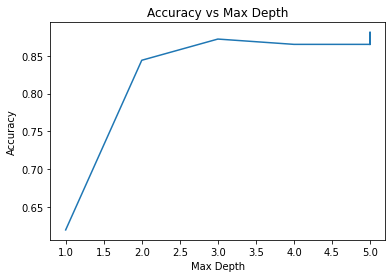

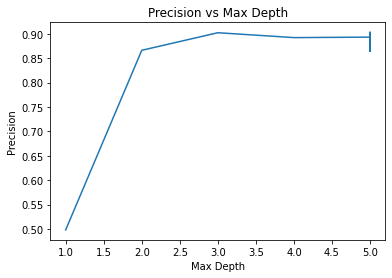

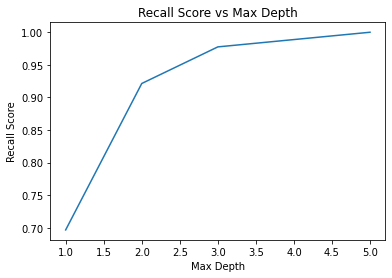

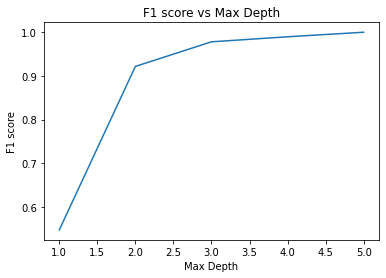

Best Max Depth:  5


 .. _digits_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.198      0.077          1      0.198108  0.098183
    0.311      0.203          2      0.318865  0.217443
    0.459      0.404          3      0.488592  0.405561
    0.544      0.545          4      0.595437  0.552480
    0.640      0.699          5      0.707290  0.701165
    0.737      0.759          6      0.822482  0.820364
    0.790      0.799          7      0.891486  0.893063
    0.806      0.822          8      0.935448  0.935539
    0.822      0.843          9      0.962159  0.962242
    0.821      0.840         10      0.983306  0.983342


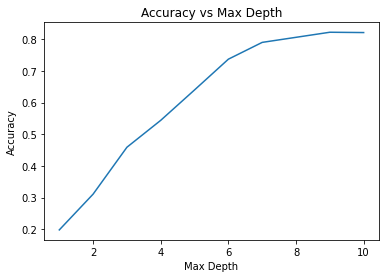

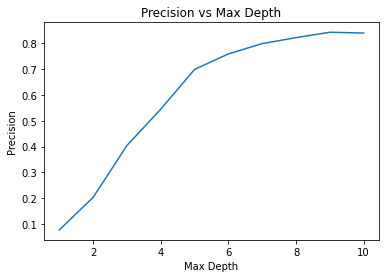

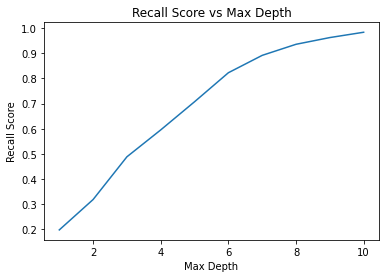

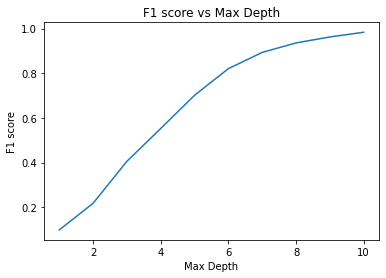

Best Max Depth:  9


In [12]:
dataset_list = [datasets.load_iris() , datasets.load_wine() , datasets.load_digits()]

for ds in dataset_list:

    # extracting the dataset name from it's description
    dataset_name = ds["DESCR"].split("\n")[0]
    print("\n\n", dataset_name , "\n\n")

    best_max_depth = main(ds)
    print("Best Max Depth: " , best_max_depth)